# Introduction to Keras
Keras is a high-level neural network library that runs on top of lower-level deep learning frameworks such as TensorFlow, Theano, and CNTK. Keras provides a user-friendly interface for building and training deep neural networks. It is designed to be easy to use and highly modular, allowing developers to quickly prototype and experiment with different network architectures and configurations.

Keras was developed with the goal of making deep learning accessible to a wider audience, including researchers, engineers, and students. It abstracts away many of the details of building and training neural networks, allowing users to focus on the high-level structure and behavior of the network.

One of the key features of Keras is its modular design. Keras allows users to build complex neural networks by combining pre-built building blocks known as layers. Layers are the basic building blocks of neural networks, and they can be stacked together to form more complex networks. Keras provides a large library of pre-built layers, including convolutional layers, recurrent layers, and dense layers.

Keras also provides a variety of tools for training and evaluating neural networks. These include built-in support for common optimization algorithms, such as stochastic gradient descent, as well as tools for monitoring training progress and visualizing model performance.

Keras has become a popular choice for deep learning projects due to its ease of use, modularity, and flexibility. It is widely used in both industry and academia for a variety of applications, including computer vision, natural language processing, and speech recognition.

# Example Projects on Classification and Regression

### Classification Projects:

1. **Image Classification:** This involves building a model that can classify images into different categories. For example, classifying images of animals into categories such as cats, dogs, and birds.
2. **Sentiment Analysis:** This involves building a model that can classify text into different sentiment categories such as positive, negative, or neutral. For example, analyzing customer reviews to determine their sentiment towards a product or service.
3. **Fraud Detection:** This involves building a model that can classify transactions into fraudulent or non-fraudulent categories. For example, detecting fraudulent credit card transactions based on patterns in the data.

### Regression Projects:

1. **House Price Prediction:** This involves building a model that can predict the price of a house based on features such as its location, size, and number of rooms.
2. **Stock Price Prediction:** This involves building a model that can predict the future price of a stock based on historical price data and other factors such as news articles and economic indicators.
3. **Energy Consumption Prediction:** This involves building a model that can predict the amount of energy consumed by a building based on factors such as weather, occupancy, and time of day.

All of these projects require gathering and preprocessing data, choosing appropriate machine learning algorithms, tuning hyperparameters, and evaluating the model's performance. These projects can be implemented using various machine learning libraries such as Scikit-learn, TensorFlow, and Keras.

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [32]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [33]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
# Create a pandas dataframe from the data
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
23,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.20090,0.2822,0.07526
85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,...,22.93,27.68,152.20,1603.0,0.1398,0.2089,0.3157,0.16420,0.3695,0.08579
528,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,0.2160,0.07253
325,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984,...,13.71,21.10,88.70,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888
423,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,0.1848,0.06181,...,15.14,25.50,101.40,708.8,0.1147,0.3167,0.3660,0.14070,0.2744,0.08839


In [35]:
# Add the target variable to the dataframe
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [37]:
# Convert the target variable to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [38]:
# Define the model architecture
model = Sequential()
model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [39]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Train the model
fitting = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 1.1604 - accuracy: 0.8022 - val_loss: 0.5522 - val_accuracy: 0.8333
Epoch 2/50
15/15 [==============================] - 1s 45ms/step - loss: 0.4914 - accuracy: 0.8879 - val_loss: 0.1378 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3732 - accuracy: 0.9033 - val_loss: 0.1346 - val_accuracy: 0.9386
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.9099 - val_loss: 0.2115 - val_accuracy: 0.9123
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4534 - accuracy: 0.8637 - val_loss: 0.3067 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4258 - accuracy: 0.8923 - val_loss: 0.1265 - val_accuracy: 0.9386
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4531 - accuracy: 0.8923 - val_loss: 0.1412 - val_accuracy: 0.9386
Epoch 8/50
15/15 [

In [41]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9211
Test loss: 0.17064876854419708
Test accuracy: 0.9210526347160339


In [42]:
history_dict = fitting.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

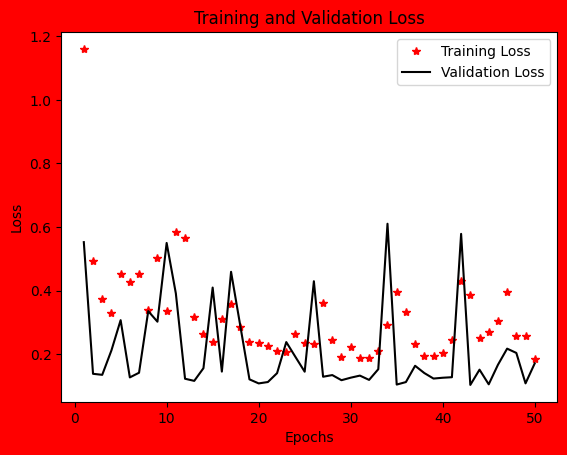

In [44]:
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'r*', label='Training Loss')
plt.plot(epochs, val_loss_values, 'black', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.facecolor'] = 'red'
plt.legend()
plt.show()

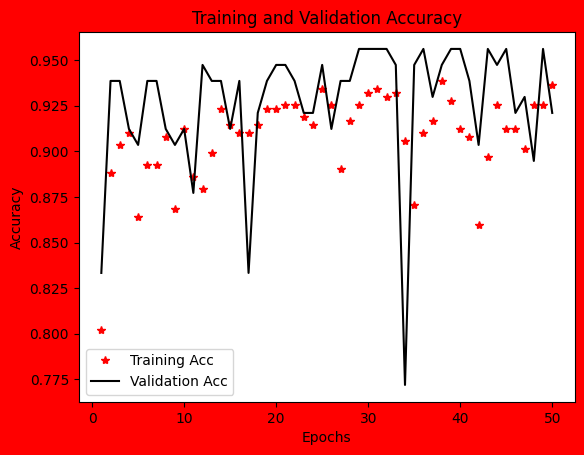

In [45]:
plt.plot(epochs, acc, 'r*', label='Training Acc')
plt.plot(epochs, val_acc, 'black', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.rcParams['figure.facecolor'] = 'red'
plt.legend()
plt.show()

In [46]:
plt.clf()

<Figure size 640x480 with 0 Axes>

# For Multi-Class Classification

In [47]:
from sklearn.datasets import load_iris
from tensorflow import keras
from keras import models
from keras import layers

In [48]:
# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [49]:
# Convert the target labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [50]:
# Define the model architecture
model = keras.models.Sequential([keras.layers.Dense(10, activation='relu', input_shape=(4,)),
                                 keras.layers.Dense(3, activation='softmax')])

In [51]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 2.1339 - accuracy: 0.0104 - val_loss: 2.0210 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1.9153 - accuracy: 0.0000e+00 - val_loss: 1.8348 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 1.7207 - accuracy: 0.0000e+00 - val_loss: 1.6986 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 1.5714 - accuracy: 0.0000e+00 - val_loss: 1.6020 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 1.4847 - accuracy: 0.0208 - val_loss: 1.5271 - val_accuracy: 0.1250
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 1.4226 - accuracy: 0.2396 - val_loss: 1.4693 - val_accuracy: 0.2500
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 1.3783 - accuracy: 0.3333 - val_loss: 1.4207 - val_accuracy: 0.

In [53]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 24ms/step - loss: 0.4743 - accuracy: 0.7000
Test accuracy: 0.699999988079071


In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

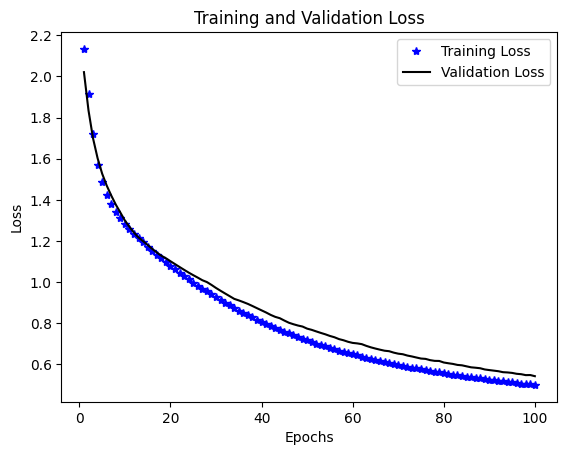

In [56]:
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'b*', label='Training Loss')
plt.plot(epochs, val_loss_values, 'black', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.facecolor'] = 'white'
plt.legend()
plt.show()

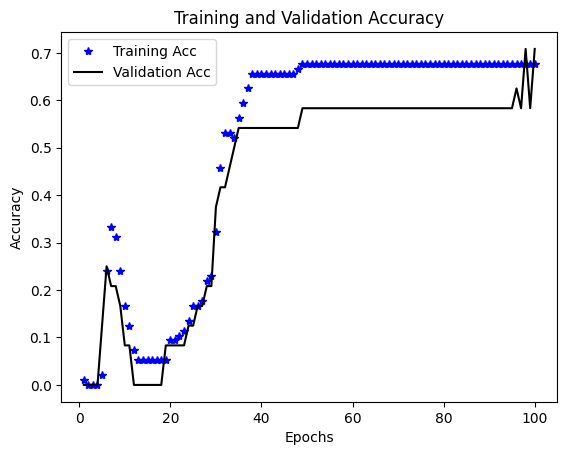

In [57]:
plt.plot(epochs, acc, 'b*', label='Training Acc')
plt.plot(epochs, val_acc, 'black', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.rcParams['figure.facecolor'] = 'white'
plt.legend()
plt.show()

# Bike Sharing Model: A Regression Example

In [4]:
import pandas as pd
import requests
from zipfile import ZipFile
from io import BytesIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))

df = pd.read_csv(zip_file.open('day.csv'), usecols=['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])

In [5]:
df.sample(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
599,600,3,1,8,0,3,1,1,0.667500,0.621854,0.677083,0.070283,1094,6281,7375
333,334,4,0,11,0,3,1,1,0.325000,0.311221,0.613333,0.271158,188,3425,3613
690,691,4,1,11,0,3,1,1,0.353333,0.364892,0.613750,0.103246,615,4531,5146
636,637,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,1045,6370,7415
190,191,3,0,7,0,0,0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder()

X_numerical = scaler.fit_transform(df[['temp', 'hum', 'windspeed', 'cnt']])
X_categorical = encoder.fit_transform(df[['season', 'weathersit']])
X = np.concatenate([X_numerical, X_categorical.toarray()], axis=1)
y = df['registered']

In [12]:
print(X_numerical,"\n")
print(X_categorical)

[[-0.82666213  1.25017133 -0.38789169 -1.81795256]
 [-0.72109471  0.47911298  0.74960172 -1.91299949]
 [-1.63465665 -1.33927398  0.74663186 -1.62992496]
 ...
 [-1.32322427  0.87839173 -0.85355213 -1.63405743]
 [-1.30955752 -1.01566357  2.06944426 -1.39902293]
 [-1.52822548 -0.35406086 -0.46020122 -0.91707305]] 

  (0, 0)	1.0
  (0, 5)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 0)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (4, 4)	1.0
  (5, 0)	1.0
  (5, 4)	1.0
  (6, 0)	1.0
  (6, 5)	1.0
  (7, 0)	1.0
  (7, 5)	1.0
  (8, 0)	1.0
  (8, 4)	1.0
  (9, 0)	1.0
  (9, 4)	1.0
  (10, 0)	1.0
  (10, 5)	1.0
  (11, 0)	1.0
  (11, 4)	1.0
  (12, 0)	1.0
  :	:
  (718, 4)	1.0
  (719, 3)	1.0
  (719, 5)	1.0
  (720, 0)	1.0
  (720, 5)	1.0
  (721, 0)	1.0
  (721, 4)	1.0
  (722, 0)	1.0
  (722, 4)	1.0
  (723, 0)	1.0
  (723, 5)	1.0
  (724, 0)	1.0
  (724, 5)	1.0
  (725, 0)	1.0
  (725, 6)	1.0
  (726, 0)	1.0
  (726, 5)	1.0
  (727, 0)	1.0
  (727, 5)	1.0
  (728, 0)	1.0
  (728, 5)	1.0
  (729, 0)	1.0
  (729, 4)	1.0
  (73

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1)])

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 15981745.0000 - val_loss: 15052875.0000
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 15973550.0000 - val_loss: 15042184.0000
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 15956135.0000 - val_loss: 15018090.0000
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 15917729.0000 - val_loss: 14965802.0000
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 15835646.0000 - val_loss: 14856486.0000
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 15670660.0000 - val_loss: 14645293.0000
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 15364699.0000 - val_loss: 14269618.0000
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 14848859.0000 - val_loss: 13647954.0000
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 14025010.0000 - val_lo

In [17]:
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')

5/5 [==============================] - 0s 2ms/step - loss: 213048.7969
Test loss: 213048.7969


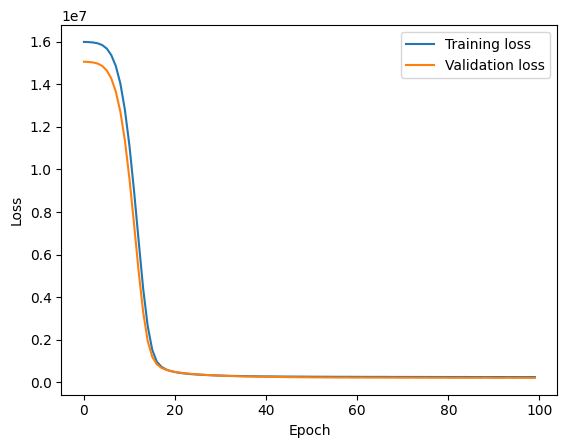

In [18]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test)
y_pred

array([[5411.8145],
       [1461.5817],
       [3292.9746],
       [4841.3394],
       [6149.533 ],
       [5688.467 ],
       [1578.0433],
       [1858.0928],
       [5984.677 ],
       [4397.6816],
       [1662.6654],
       [2723.2434],
       [3735.8164],
       [4391.387 ],
       [1797.7769],
       [2075.8193],
       [1709.2965],
       [6587.2637],
       [4168.391 ],
       [1981.0463],
       [6033.323 ],
       [4238.793 ],
       [4231.292 ],
       [1680.5814],
       [1662.2794],
       [4012.9648],
       [1715.0936],
       [6047.7085],
       [3210.272 ],
       [4600.581 ],
       [2358.7236],
       [3149.3994],
       [4783.426 ],
       [5803.4814],
       [4610.424 ],
       [2667.7354],
       [6062.617 ],
       [4901.289 ],
       [2333.0298],
       [1295.1515],
       [2971.43  ],
       [3315.0007],
       [5943.293 ],
       [3836.1704],
       [5447.1714],
       [1127.1669],
       [3437.2808],
       [4328.369 ],
       [4611.2197],
       [4018.0754],


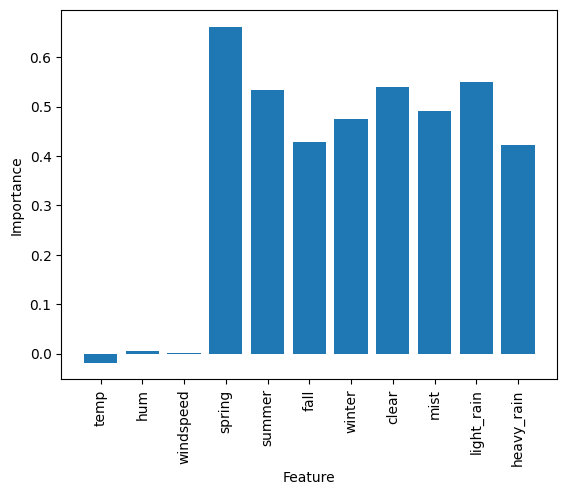

In [24]:
importance = model.layers[0].get_weights()[0].mean(axis=1)
plt.bar(range(X_train.shape[1]), importance)
plt.xticks(range(X_train.shape[1]), ['temp', 'hum', 'windspeed', 'spring', 'summer', 'fall', 'winter', 'clear', 'mist', 'light_rain', 'heavy_rain'], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [26]:
def create_model(hidden_layers=(64,), dropout=0.0):
    model = Sequential()
    for i, neurons in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
        else:
            model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'hidden_layers': [(32,), (64,), (128,), (32, 16), (64, 32), (128, 64)],
          'dropout': [0.0, 0.1, 0.2, 0.3],
          'batch_size': [16, 32, 64]}

model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model)
grid_search = GridSearchCV(model, param_grid=params, cv=3)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

C:\Users\perfect\AppData\Local\Temp\ipykernel_9112\690758770.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model)


37/37 [==============================] - 1s 2ms/step - loss: 15975659.0000
Best parameters: {'batch_size': 16, 'dropout': 0.1, 'hidden_layers': (128, 64)}
Best score: -15961662.666666666
